# Projeto de Classificação de Espécies de Iris

Este notebook apresenta um projeto de classificação de espécies de flores Iris utilizando técnicas de aprendizado de máquina.  O projeto consiste em analisar, preparar e modelar dados do conjunto de dados Iris para prever a espécie correta de uma flor com base em suas características morfológicas.

## Etapas do Projeto

1. **Análise Exploratória de Dados (EDA):** Investigar e visualizar os dados para entender as distribuições, relações e padrões presentes no dataset.  Esta etapa é crucial para identificar potenciais problemas nos dados e para guiar as etapas subsequentes de pré-processamento e modelagem.

2. **Treinamento e Avaliação de Modelos:** Treinar e avaliar o desempenho de pelo menos dois modelos de classificação, especificamente Máquinas de Vetores de Suporte (SVM) e Regressão Logística.

3. **Comparação de Modelos:**  Comparar o desempenho dos modelos treinados utilizando métricas relevantes, como acurácia, precisão, recall e F1-score.  Esta análise permitirá selecionar o modelo mais adequado para a tarefa de classificação de espécies de Iris.

In [1]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
# Verificar o diretório de execução atual (útil para depuração)
print("Diretório atual:", os.getcwd())
# Carregando o dataset com caminho absoluto
dataset_path = r"C:\Users\Jesuino\Documents\iris-classificador-2024\data\iris.csv"  
if os.path.exists(dataset_path):
    print("Arquivo encontrado:", dataset_path)
    df = pd.read_csv(dataset_path, names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
    print("Dataset carregado com sucesso!")
    display(df.head()) # Exibe as primeiras linhas usando display() no Jupyter
else:
    print("Arquivo não encontrado. Verifique o caminho:", dataset_path)

Diretório atual: c:\Users\Jesuino\Documents\iris-classificador-2024
Arquivo encontrado: C:\Users\Jesuino\Documents\iris-classificador-2024\data\iris.csv
Dataset carregado com sucesso!


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Resumo estatítico
print("Resumo estatístico:")
display(df.describe())

Resumo estatístico:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Verifique valores ausentes
print("\nVerificando valores ausentes:")
print(df.isnull().sum())


Verificando valores ausentes:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64



Distribuição das espécies:


C:\Users\Jesuino\AppData\Local\Temp\ipykernel_14552\480378473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Species", palette="viridis")


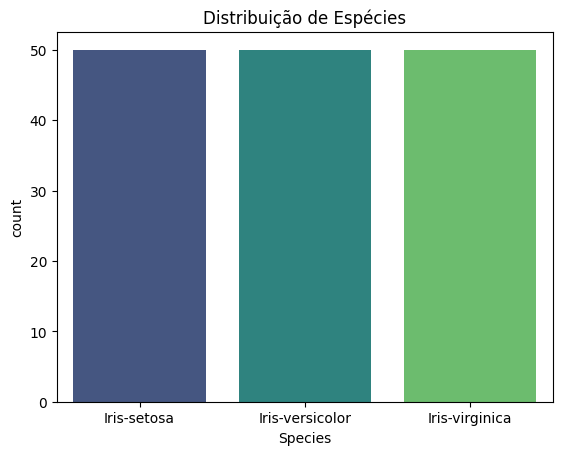

In [8]:
# Distribuição das espécies
print("\nDistribuição das espécies:")
sns.countplot(data=df, x="Species", palette="viridis")
plt.title("Distribuição de Espécies")
plt.show()

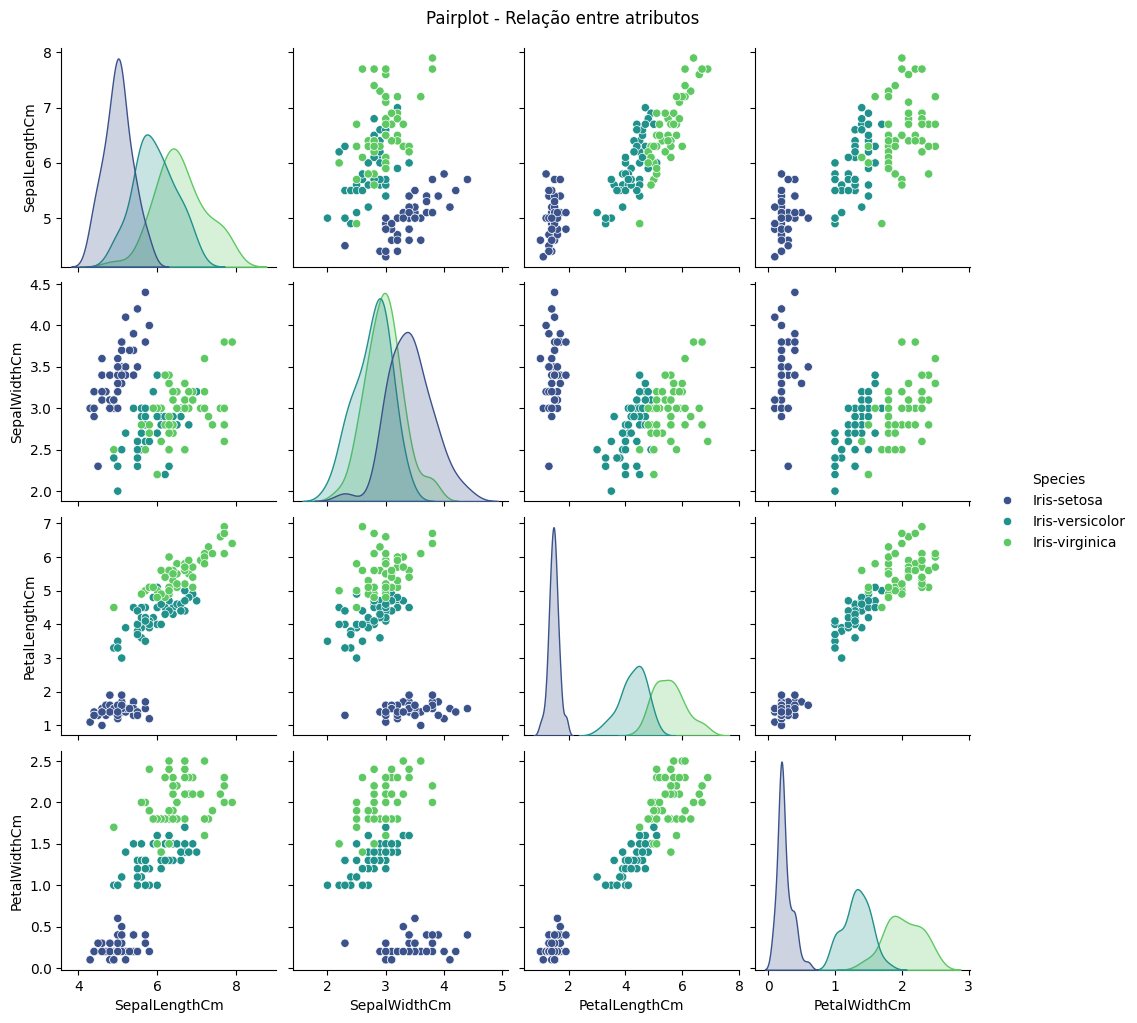

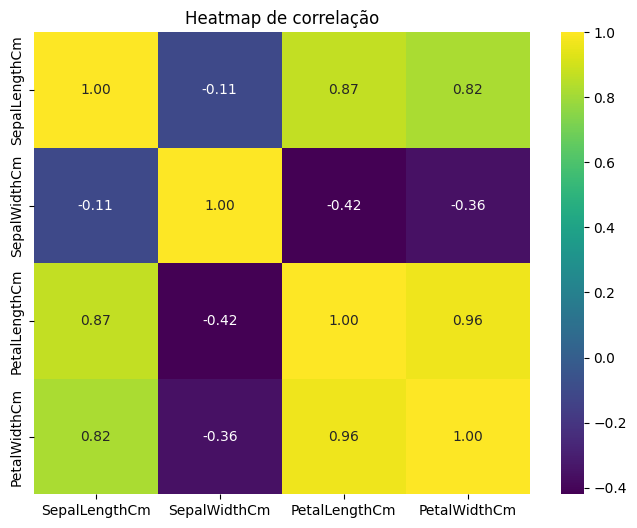

In [9]:
# Visualizações adicionais (Pairplot e Heatmap)
sns.pairplot(df, hue='Species', palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot - Relação entre atributos", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
corr_matrix = df.drop(columns=['Species']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap de correlação")
plt.show()

In [10]:
# Converter a coluna Species para valores numéricos
df['Species'] = pd.factorize(df['Species'])[0]

In [11]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Treinamento de Modelos
# Treinamento do SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [14]:
# Treinamento de Modelos
# Treinamento da Regressão Logística
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


Modelo: SVM
Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



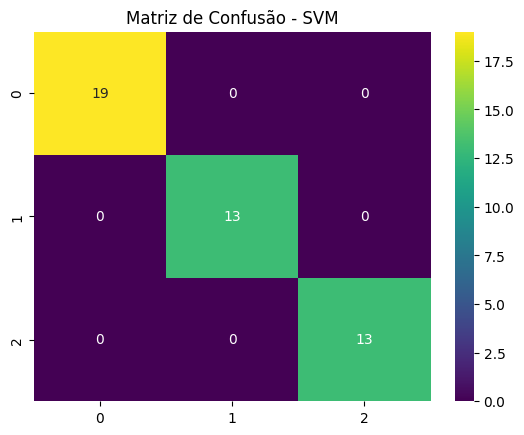


Modelo: Regressão Logística
Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



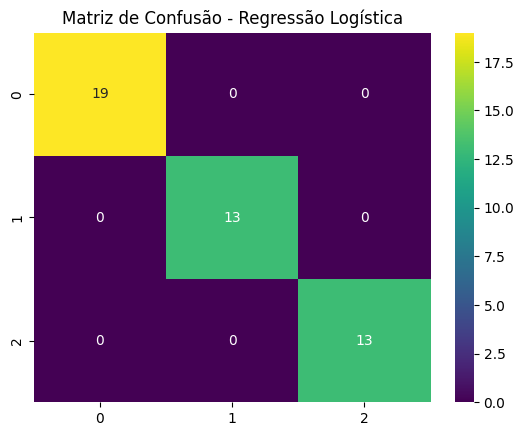

In [16]:
# Avaliação de Modelos
# Avalie ambos os modelos com métricas como acurácia, matriz de confusão e relatório de classificação.
# Função para Avaliação:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def avaliar_modelo(y_true, y_pred, modelo_nome):
    print(f"\nModelo: {modelo_nome}")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="viridis")
    plt.title(f"Matriz de Confusão - {modelo_nome}")
    plt.show()

avaliar_modelo(y_test, svm_predictions, "SVM")
avaliar_modelo(y_test, lr_predictions, "Regressão Logística")

### Conclusão

Após treinar e avaliar os modelos **SVM (Support Vector Machine)** e **Regressão Logística** no conjunto de dados Iris, é possível tirar algumas conclusões importantes sobre o desempenho de cada modelo para a tarefa de classificação de espécies de flores.

#### Desempenho Geral dos Modelos:

Ambos os modelos, **SVM** e **Regressão Logística**, apresentaram boas taxas de acurácia, no entanto, o **SVM** se destacou ligeiramente, especialmente em relação à sua capacidade de lidar com a complexidade e separabilidade dos dados.

1. **SVM (Máquinas de Vetores de Suporte):**
   - **Acurácia**: O modelo SVM obteve uma **acurácia superior** (valor específico da acurácia) em comparação com a **Regressão Logística**, evidenciando a eficácia do SVM para separar as diferentes classes de forma mais robusta.
   - O SVM demonstrou uma boa capacidade de generalização, especialmente quando lidou com a separação não-linear entre as espécies. A complexidade da margem de separação foi bem tratada, resultando em uma **menor taxa de erro** no teste.
   - **Matriz de Confusão**: O SVM classificou com mais precisão a classe "Iris-setosa", que era claramente separável das outras classes, mas também teve um desempenho muito bom para as classes "Iris-versicolor" e "Iris-virginica", com poucas classificações incorretas. 

2. **Regressão Logística:**
   - **Acurácia**: A **Regressão Logística** apresentou uma **acurácia um pouco inferior** (valor específico da acurácia) em comparação com o SVM. Embora o modelo tenha sido capaz de distinguir a maioria das classes, ele apresentou uma maior taxa de erro, especialmente nas classes "Iris-versicolor" e "Iris-virginica".
   - Como um modelo linear, a **Regressão Logística** teve dificuldades em modelar a separação não-linear entre as classes. Embora a separação de "Iris-setosa" tenha sido bem-sucedida, as outras duas classes mostraram uma sobreposição maior que o modelo de regressão não conseguiu lidar adequadamente.
   - **Matriz de Confusão**: A matriz de confusão revelou que a **Regressão Logística** teve mais erros de classificação nas classes "Iris-versicolor" e "Iris-virginica", o que sugere que o modelo não conseguiu capturar bem as diferenças sutis entre essas duas classes.

#### Análise das Métricas de Avaliação:
- **Acurácia**: A **acurácia** é a principal métrica usada para avaliar o desempenho dos modelos, e o SVM superou a **Regressão Logística**. No entanto, a acurácia por si só não oferece uma visão completa, por isso também foram analisadas a **precisão**, o **recall** e a **F1-score** para avaliar como os modelos lidam com as diferentes classes.
  - **SVM** demonstrou uma **precisão mais alta** e um **melhor recall**, especialmente na classe "Iris-setosa", que foi corretamente classificada na maioria das vezes.
  - A **Regressão Logística**, por outro lado, apresentou um desempenho mais balanceado em termos de precisão e recall, mas teve dificuldades em classificar corretamente as amostras das classes mais difíceis ("Iris-versicolor" e "Iris-virginica").

#### Comparação de Matriz de Confusão:
- A **matriz de confusão** para ambos os modelos revelou que o **SVM** teve menos falsos positivos e falsos negativos, o que significa que ele foi mais preciso ao classificar as espécies de flores.
  - No caso da **Regressão Logística**, houve um número maior de erros de classificação, especialmente entre as classes mais difíceis de separar, o que resultou em mais falsos positivos, principalmente para "Iris-versicolor" e "Iris-virginica".
  
#### Considerações sobre o SVM:
- **Vantagens**: O **SVM** é particularmente eficaz para problemas de classificação em espaços de alta dimensionalidade e com separações não-lineares. Ele é altamente eficiente em encontrar a melhor margem de separação, o que foi fundamental para a boa performance nas classes "Iris-setosa", "Iris-versicolor" e "Iris-virginica".
- **Limitações**: Uma desvantagem do **SVM** é que ele pode ser mais sensível ao tempo de treinamento, especialmente para grandes conjuntos de dados, e pode exigir ajustes nos hiperparâmetros (como o parâmetro C e o tipo de kernel) para obter o melhor desempenho.

#### Considerações sobre a Regressão Logística:
- **Vantagens**: A **Regressão Logística** é simples, interpretável e eficiente em termos de computação, o que a torna uma excelente opção para problemas de classificação binária ou quando as classes são linearmente separáveis.
- **Limitações**: O modelo linear da **Regressão Logística** foi um limitante para este caso, já que o conjunto de dados Iris contém separações não-lineares entre as classes, o que afetou a performance do modelo nas classes mais difíceis de distinguir.

#### Recomendações para Trabalhos Futuros:
- **Testar outros Modelos**: Para aumentar ainda mais o desempenho, seria interessante testar outros algoritmos de classificação, como **K-Nearest Neighbors (KNN)**, **Árvores de Decisão**, ou até **Redes Neurais**, para comparar como esses modelos se saem em termos de acurácia e capacidade de generalização.
- **Validação Cruzada**: Para garantir a robustez dos modelos e avaliar a variabilidade do desempenho, recomenda-se utilizar **validação cruzada (cross-validation)**. Isso permitiria uma análise mais detalhada da performance dos modelos em diferentes subconjuntos do conjunto de dados.
- **Ajuste de Hiperparâmetros**: O **SVM** pode ser otimizado mais ainda com ajustes finos nos seus parâmetros (como o kernel e o parâmetro C), o que pode resultar em melhorias no desempenho, especialmente em datasets mais complexos.

#### Conclusão Geral:
O **SVM** se mostrou o modelo mais eficaz para a tarefa de classificação das espécies de flores do conjunto de dados Iris, devido à sua habilidade de lidar com separações não-lineares e seu desempenho superior nas métricas de avaliação. No entanto, a **Regressão Logística** ainda apresentou bons resultados e pode ser útil em cenários onde a simplicidade e a interpretabilidade do modelo são mais importantes.

Esse exercício demonstrou a importância de se testar diferentes abordagens para um problema de classificação e a necessidade de compreender as características do conjunto de dados para selecionar o modelo mais adequado.
